# **Quantium Data Analytics Internship - Task Two (2)**

## Loading Libraries and Datasets for the Analysis

In [1]:
# Loading the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import stdev

In [2]:
# Loading the cleaned and merged dataaset
df = pd.read_csv('QVI_data.csv')

In [3]:
df.shape

(264834, 12)

In [4]:
df.dtypes

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

In [5]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [6]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [7]:
# Converting the date column to a datetime object
df['DATE'] = pd.to_datetime(df['DATE'])

## Extracting Stores with Transactions in every Month

In [8]:
len(df['STORE_NBR'].unique())

272

In [9]:
df['MONTH'] = df['DATE'].dt.strftime('%B')

In [10]:
df['YEAR_MONTH'] = df['DATE'].dt.strftime('%Y-%m')

In [11]:
# Number of months with transactions per store
n_months_perstore = df.groupby('STORE_NBR')['YEAR_MONTH'].nunique().reset_index()

In [12]:
# Filtering for stores that have transactions recorded for every month
full_obs = n_months_perstore[n_months_perstore['YEAR_MONTH'] == 12]

In [13]:
full_obs

,STORE_NBR,YEAR_MONTH
0,1,12
1,2,12
2,3,12
3,4,12
4,5,12
...,...,...
267,268,12
268,269,12
269,270,12
270,271,12


The stores who don't have transactions for at least one month have been filtered, now to reflect on the dataset.

In [14]:
# Storing the eligible stores for the analysis to a variable
store_df = df

In [15]:
# Extracting the relevant informmation from the 
monthly_revenue = store_df.groupby(['STORE_NBR','YEAR_MONTH'])['TOT_SALES'].sum().reset_index()

monthly_customers = store_df.groupby(['STORE_NBR','YEAR_MONTH'])['LYLTY_CARD_NBR'].nunique().reset_index()

monthly_txn = store_df.groupby(['STORE_NBR','YEAR_MONTH'])['TXN_ID'].count().reset_index()

monthly_nchips = store_df.groupby(['STORE_NBR','YEAR_MONTH'])['PROD_QTY'].sum().reset_index()

In [16]:
# Aggregating all the necessary metrics for further analysis
store_agg = pd.concat([monthly_revenue, monthly_customers['LYLTY_CARD_NBR'],
                       monthly_txn['TXN_ID'], monthly_nchips['PROD_QTY']],
                       axis=1,
                       ignore_index=True)

store_agg.columns = ['store_nbr','year_month','tot_sales','n_customers',
                  'n_txns','n_chips']

In [17]:
# Computing more of the necessary metrics
store_agg['txn_per_customer'] = store_agg['n_txns']/store_agg['n_customers']

store_agg['chips_per_customer'] = store_agg['n_chips']/store_agg['n_customers']

store_agg['avgprice_per_unit'] = store_agg['tot_sales']/store_agg['n_chips']

In [18]:
# Dropping rows that are not necessary for the analysis
store_agg.drop(columns=['n_txns','n_chips'], inplace=True)

In [19]:
store_agg.head()

,store_nbr,year_month,tot_sales,n_customers,txn_per_customer,chips_per_customer,avgprice_per_unit
0,1,2018-07,206.9,49,1.061224,1.265306,3.337097
1,1,2018-08,176.1,42,1.023810,1.285714,3.261111
2,1,2018-09,278.8,59,1.050847,1.271186,3.717333
3,1,2018-10,188.1,44,1.022727,1.318182,3.243103
4,1,2018-11,192.6,46,1.021739,1.239130,3.378947


In [20]:
store_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_nbr           3169 non-null   int64  
 1   year_month          3169 non-null   object 
 2   tot_sales           3169 non-null   float64
 3   n_customers         3169 non-null   int64  
 4   txn_per_customer    3169 non-null   float64
 5   chips_per_customer  3169 non-null   float64
 6   avgprice_per_unit   3169 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 173.4+ KB


In [21]:
# Filtering the store aggregate data for pretrial metrics, before February 2019
pretrial_metric = store_agg[(store_agg['year_month'] < '2019-02') & 
                            (store_agg['store_nbr'].isin(full_obs['STORE_NBR']))]

In [22]:
pretrial_metric.shape

(1820, 7)

In [23]:
# Function to calculate the correlation between a trial store and control stores
def calcCorrelation(metric_col,trial_store,df_x):
    '''
    Calculates the correlation coefficient between all the control stores and the
    specified trial store.

    Args:
        metric_col (str): The column metric on which the correlation coefficient should be 
                          calculated
        
        trial_store (int): The trial store number that is being compared with other control stores. 
                           Options are: 'tot_sales', 'n_customers', 'txn_per_customer', 
                           'chips_per_customer', 'avgprice_per_unit'.
        
        df (pd.DataFrame): The dataframe containing all metrics for both trial and control stores

    Returns:
        Pandas DataFrama Object: Dataframe with three columns the trial store number, 
        control store number, and the magnitude distance.
    '''

    # Creating an output dictionary to store the values generated
    output = {'trial_store': [],'control_store':[],'corr_coef':[]}

    # Extracting the specified metric column for the trial stores
    trial_val = df_x[df_x['store_nbr'] == trial_store][metric_col].reset_index(drop=True)

    # Creating a series for the store numbers to loop through
    store_num = df_x['store_nbr'].unique()

    # Looping through all the stores to generate the coefficient metric
    for i in store_num:
        control_val = df_x[df_x['store_nbr'] == i][metric_col].reset_index(drop=True)
        output['trial_store'].append(trial_store)
        output['control_store'].append(i)
        output['corr_coef'].append(control_val.corr(trial_val))
    
    # Saving the populated dictionary to a dataframe
    output_df = pd.DataFrame(output)

    return output_df

**Calculating Magnitude Distance**  
1 - (Observed distance – minimum distance)/(Maximum distance – minimum distance)

In [24]:
# Function to calculate the magnitude distance between a trial store and control stores
def calcMagnitudeDistance(metric_col,trial_store,df_x):
    '''
    Calculates the magnitude distance between all the control stores and the
    specified trial store

    Args:
        metric_col (str): The column metric on which the magnitude distance should be calculated
        
        trial_store (int): The trial store number that is being compared with other control stores. 
                           Options are: 'tot_sales', 'n_customers', 'txn_per_customer', 
                           'chips_per_customer', 'avgprice_per_unit'.
        
        df (pd.DataFrame): The dataframe containing all metrics for both trial and control stores

    Returns:
        Pandas DataFrama Object: Dataframe with three columns the trial store number, 
        control store number, and the magnitude distance.
    '''

    # Creating an output dictionary to store the values generated
    output = {'trial_store': [],'control_store':[],'mag_distance':[]}

    # Extracting the specified metric column for the trial stores
    trial_val = df_x[df_x['store_nbr'] == trial_store][metric_col].reset_index(drop=True)

    # Creating a series for the store numbers to loop through
    store_num = df_x['store_nbr'].unique()

    # Looping through all the stores to generate the coefficient metric
    for i in store_num:
        control_val = df_x[df_x['store_nbr'] == i][metric_col].reset_index(drop=True)
        # Defining the standard distance value
        standard = abs(control_val-trial_val)
        # Calculating the magnitude by using the provided distance formula and taking the mean
        # of the resulting series
        magnitude = (1 - ((standard-min(standard))/(max(standard)-min(standard)))).mean()
        # Saving to the dictionary variable
        output['trial_store'].append(trial_store)
        output['control_store'].append(i)
        output['mag_distance'].append(magnitude)
    
    # Saving the populated dictionary to a dataframe
    output_df = pd.DataFrame(output)

    return output_df

**Store 77: Total Sales and Number of Customers Correlations and Magnitude Distance**

In [25]:
trial_store = 77

corr_tot_sales = calcCorrelation('tot_sales',trial_store,pretrial_metric)
corr_n_customers = calcCorrelation('n_customers',trial_store,pretrial_metric)

mag_tot_sales = calcMagnitudeDistance('tot_sales',trial_store,pretrial_metric)
mag_n_customers = calcMagnitudeDistance('n_customers',trial_store,pretrial_metric)

In [26]:
sales77 = pd.concat([corr_tot_sales,mag_tot_sales['mag_distance']], axis=1)

sales77['sales_score'] = (sales77['corr_coef']*0.5) + (sales77['mag_distance']*0.5)

In [27]:
customer77 = pd.concat([corr_n_customers,mag_n_customers['mag_distance']], axis=1)

customer77['customer_score'] = (customer77['corr_coef']*0.5) + (customer77['mag_distance']*0.5)

In [28]:
customer77.head()

,trial_store,control_store,corr_coef,mag_distance,customer_score
0,77,1,0.322168,0.663866,0.493017
1,77,2,-0.572051,0.471429,-0.050311
2,77,3,0.834207,0.489796,0.662002
3,77,4,-0.295639,0.498258,0.101310
4,77,5,0.370659,0.512605,0.441632


In [29]:
sales77.head()

,trial_store,control_store,corr_coef,mag_distance,sales_score
0,77,1,0.075218,0.408163,0.241691
1,77,2,-0.263079,0.590119,0.163520
2,77,3,0.806644,0.522914,0.664779
3,77,4,-0.263300,0.644934,0.190817
4,77,5,-0.110652,0.516320,0.202834


In [30]:
# Merging sales and customer scores to one dataframe
score_control_77 = sales77.merge(customer77,on=['trial_store','control_store'])

In [31]:
# Cleaning up the column name for the merged dataframe
score_control_77.rename(columns={'corr_coef_x': 'sales_corr_coef', 'mag_distance_x': 'sales_mag_distance',
                                 'corr_coef_y': 'cust_corr_coef', 'mag_distance_y': 'cust_mag_distance'}, inplace=True)

In [32]:
score_control_77.head()

,trial_store,control_store,sales_corr_coef,sales_mag_distance,sales_score,cust_corr_coef,cust_mag_distance,customer_score
0,77,1,0.075218,0.408163,0.241691,0.322168,0.663866,0.493017
1,77,2,-0.263079,0.590119,0.163520,-0.572051,0.471429,-0.050311
2,77,3,0.806644,0.522914,0.664779,0.834207,0.489796,0.662002
3,77,4,-0.263300,0.644934,0.190817,-0.295639,0.498258,0.101310
4,77,5,-0.110652,0.516320,0.202834,0.370659,0.512605,0.441632


In [33]:
score_control_77['final_control_score'] = (score_control_77['sales_score'] * 0.5) + (score_control_77['customer_score'] * 0.5)

In [34]:
# Extracting the control store ussing the score metric
control_store = score_control_77.sort_values(by='final_control_score',
                                             ascending=False).head(1)['control_store'].reset_index(drop=True).item()

In [35]:
# Assigning values to the initialised `store_type` column
store_agg['store_type'] = (
    store_agg['store_nbr']
    .map({trial_store: 'Trial', control_store: 'Control'})
    .fillna('Other Stores')
)

In [36]:
store_agg.head()

,store_nbr,year_month,tot_sales,n_customers,txn_per_customer,chips_per_customer,avgprice_per_unit,store_type
0,1,2018-07,206.9,49,1.061224,1.265306,3.337097,Other Stores
1,1,2018-08,176.1,42,1.023810,1.285714,3.261111,Other Stores
2,1,2018-09,278.8,59,1.050847,1.271186,3.717333,Other Stores
3,1,2018-10,188.1,44,1.022727,1.318182,3.243103,Other Stores
4,1,2018-11,192.6,46,1.021739,1.239130,3.378947,Other Stores


In [37]:
store_agg.columns

Index(['store_nbr', 'year_month', 'tot_sales', 'n_customers',
       'txn_per_customer', 'chips_per_customer', 'avgprice_per_unit',
       'store_type'],
      dtype='object')

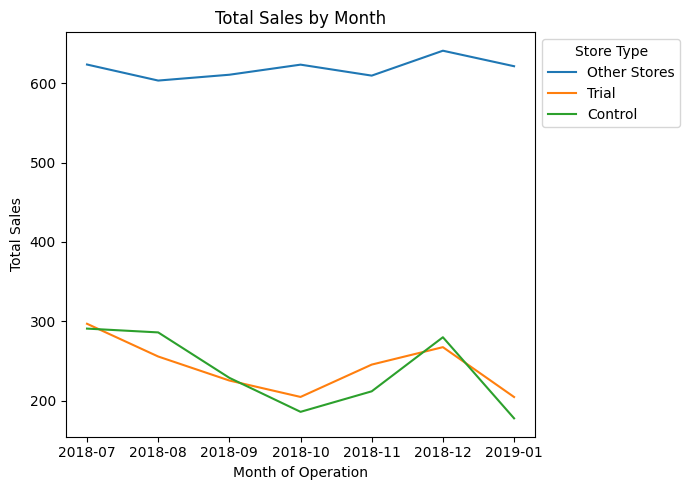

In [38]:
plt.figure(figsize=(7,5))
sns.lineplot(store_agg.loc[store_agg['year_month'] < '2019-02'],
             x='year_month',
             y='tot_sales',
             hue='store_type',
             err_style=None)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(title = 'Store Type', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.savefig('trial_77_monthly_sales.png')

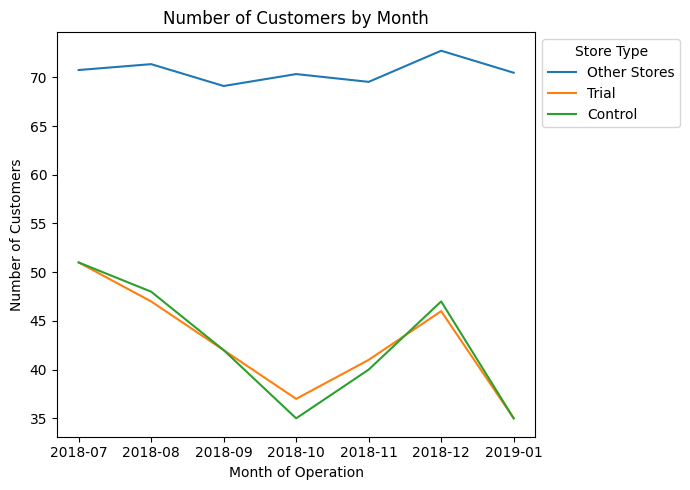

In [39]:
plt.figure(figsize=(7,5))
sns.lineplot(store_agg.loc[store_agg['year_month'] < '2019-02'],
             x='year_month',
             y='n_customers',
             hue='store_type',
             err_style=None)
plt.title('Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(title = 'Store Type', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.savefig('trial_77_n_customers.png')

From the visualisation above we can observe the similarity in sales performance and customer volume of stores 77 and 233 during the pretrial period, hence store 233 is serves as a control store suitable for the comparative analysis.

In [40]:
scaling_factor_sales = (pretrial_metric.loc[pretrial_metric['store_nbr'] == trial_store]['tot_sales'].sum()/
                        pretrial_metric.loc[pretrial_metric['store_nbr'] == control_store]['tot_sales'].sum())

In [41]:
scaling_factor_sales

1.023617303289553

In [42]:
scaled_control_sales = store_agg.loc[store_agg['store_nbr'] == control_store]

In [43]:
scaled_control_sales = scaled_control_sales.assign(control_sales = (
    scaled_control_sales['tot_sales'] * scaling_factor_sales
))

In [44]:
percentDiff = scaled_control_sales[['year_month','control_sales']].reset_index(drop=True)

In [45]:
percentDiff = percentDiff.merge(right=store_agg[store_agg['store_nbr'] == trial_store][['year_month','tot_sales']].reset_index(drop=True).rename(columns={'tot_sales': 'trial_sales'}),
                  on='year_month')

In [46]:
percentDiff['percentage_diff'] = (
    abs(percentDiff['control_sales'] - percentDiff['trial_sales'])/percentDiff['control_sales']
)

In [47]:
stdDev = stdev(percentDiff[(percentDiff['year_month'] < '2019-02')]['percentage_diff'])

In [48]:
degreesOfFreedom = 7

In [49]:
percentDiff['tValue'] = (percentDiff['percentage_diff'] - 0)/stdDev

In [50]:
percentDiff.head()

,year_month,control_sales,trial_sales,percentage_diff,tValue
0,2018-07,297.565550,296.8,0.002573,0.051515
1,2018-08,292.652187,255.5,0.126950,2.542011
2,2018-09,233.998916,225.2,0.037602,0.752940
3,2018-10,190.085733,204.5,0.075830,1.518406
4,2018-11,216.597421,245.3,0.132516,2.653459


In [51]:
pastSales = (
    percentDiff[['year_month', 'trial_sales']]  # Extract columns
    .rename(columns={'trial_sales': 'totSales'})  # Rename column
    .assign(Store_type='Trial')  # Add new column
)

pastSales.head()

,year_month,totSales,Store_type
0,2018-07,296.8,Trial
1,2018-08,255.5,Trial
2,2018-09,225.2,Trial
3,2018-10,204.5,Trial
4,2018-11,245.3,Trial


In [52]:
pastControlSales = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .rename(columns={'control_sales': 'totSales'})  # Rename column
    .assign(Store_type='Control')  # Add new column
)

pastControlSales.head()

,year_month,totSales,Store_type
0,2018-07,297.565550,Control
1,2018-08,292.652187,Control
2,2018-09,233.998916,Control
3,2018-10,190.085733,Control
4,2018-11,216.597421,Control


In [53]:
pastSales_Control95 = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .assign(totSales=lambda df: df['control_sales'] * (1 + (stdDev * 2)))  # Compute totSales
    .drop(columns=['control_sales'])  # Drop the control_sales column
    .assign(Store_type='Control 95th % confidence interval')  # Add Store_type column
)

pastSales_Control95.head()

,year_month,totSales,Store_type
0,2018-07,327.286851,Control 95th % confidence interval
1,2018-08,321.882734,Control 95th % confidence interval
2,2018-09,257.371084,Control 95th % confidence interval
3,2018-10,209.071786,Control 95th % confidence interval
4,2018-11,238.231502,Control 95th % confidence interval


In [54]:
pastSales_Control5 = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .assign(totSales=lambda df: df['control_sales'] * (1 - (stdDev * 2)))  # Compute totSales
    .drop(columns=['control_sales'])  # Drop the control_sales column
    .assign(Store_type='Control 5th % confidence interval')  # Add Store_type column
)

pastSales_Control5.head()

,year_month,totSales,Store_type
0,2018-07,267.844249,Control 5th % confidence interval
1,2018-08,263.421640,Control 5th % confidence interval
2,2018-09,210.626747,Control 5th % confidence interval
3,2018-10,171.099680,Control 5th % confidence interval
4,2018-11,194.963341,Control 5th % confidence interval


In [55]:
trialAssessment = (pd.concat([pastSales,pastControlSales,pastSales_Control5,pastSales_Control95], axis=0)
                   .sort_values('year_month')
                   .reset_index(drop=True))

trialAssessment.head()

,year_month,totSales,Store_type
0,2018-07,296.800000,Trial
1,2018-07,267.844249,Control 5th % confidence interval
2,2018-07,327.286851,Control 95th % confidence interval
3,2018-07,297.565550,Control
4,2018-08,255.500000,Trial


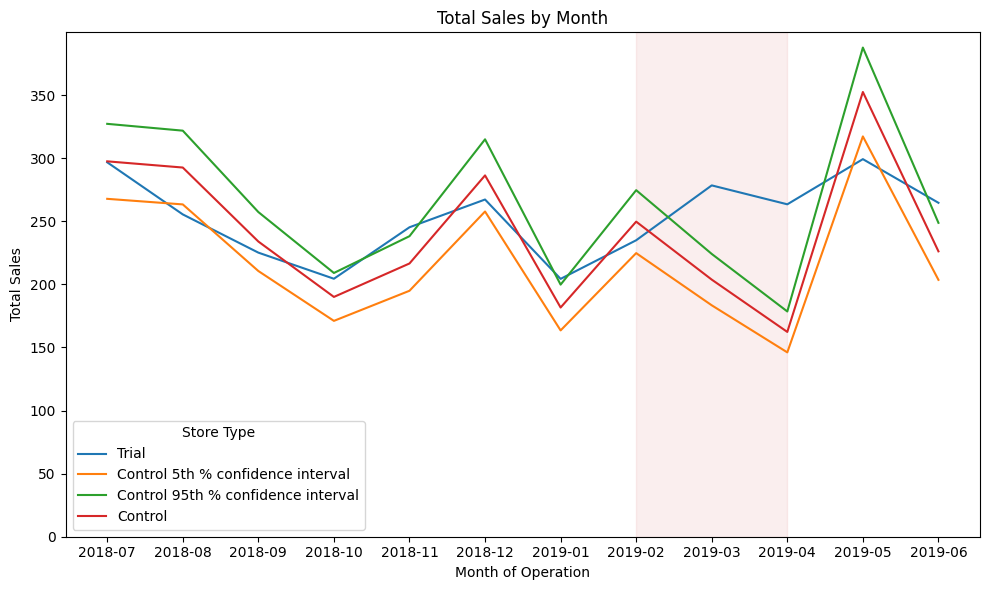

In [56]:
plt.figure(figsize=(10,6))
sns.lineplot(trialAssessment,
             x='year_month',
             y='totSales',
             hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.ylim(bottom = 0)
plt.legend(title = 'Store Type')
plt.axvspan(xmin='2019-02', xmax='2019-04', color = '#d65f5f', alpha = 0.1)
plt.tight_layout()
plt.savefig('sales_77.png')
plt.show()

The results show that the trial in store 77 is evidently different from the control store during the trial period, as the trial store performance is significantly better than that of the control store in two out of the three month trial period.

In [57]:
scaling_factor_customer = (pretrial_metric.loc[pretrial_metric['store_nbr'] == trial_store]['n_customers'].sum()/
                           pretrial_metric.loc[pretrial_metric['store_nbr'] == control_store]['n_customers'].sum())

In [58]:
scaling_factor_customer

1.0033557046979866

In [59]:
scaled_control_customer = store_agg.loc[store_agg['store_nbr'] == control_store]

In [60]:
scaled_control_customer = scaled_control_customer.assign(
    control_customer = (scaled_control_customer['n_customers'] * scaling_factor_customer)
)

In [61]:
scaled_control_customer.head()

,store_nbr,year_month,tot_sales,n_customers,txn_per_customer,chips_per_customer,avgprice_per_unit,store_type,control_customer
2699,233,2018-07,290.7,51,1.058824,1.725490,3.303409,Control,51.171141
2700,233,2018-08,285.9,48,1.041667,1.666667,3.573750,Control,48.161074
2701,233,2018-09,228.6,42,1.071429,1.666667,3.265714,Control,42.140940
2702,233,2018-10,185.7,35,1.028571,1.600000,3.316071,Control,35.117450
2703,233,2018-11,211.6,40,1.025000,1.550000,3.412903,Control,40.134228


In [62]:
trial_customer = store_agg[['year_month', 'store_nbr', 'n_customers']]
trial_customer = trial_customer.loc[trial_customer['store_nbr'] == trial_store]
trial_customer.drop(columns=['store_nbr'], inplace=True)

In [63]:
percentageDiff = (
    scaled_control_customer[['year_month','control_customer']]
    .merge(right = trial_customer, on = 'year_month')
    .rename(columns = {'n_customers' : 'trial_customers'})
    .assign(percDiff = lambda df: abs(df['control_customer'] - df['trial_customers'])/df['control_customer'])
)

percentageDiff.head()

,year_month,control_customer,trial_customers,percDiff
0,2018-07,51.171141,51,0.003344
1,2018-08,48.161074,47,0.024108
2,2018-09,42.140940,42,0.003344
3,2018-10,35.117450,37,0.053607
4,2018-11,40.134228,41,0.021572


In [64]:
stdDev = stdev(percentageDiff[percentageDiff['year_month'] < '2019-02']['percDiff'])

In [65]:
degreesOfFreedom = 7 # 8 months under observation, hence the degree of freedom is (8 - 1 = 7)

In [66]:
pastCustomers = store_agg[['year_month','n_customers','store_type']]
pastCustomers = pastCustomers.loc[pastCustomers['store_type'].isin(['Trial','Control'])].reset_index(drop=True)

pastCustomers.head()

,year_month,n_customers,store_type
0,2018-07,51,Trial
1,2018-08,47,Trial
2,2018-09,42,Trial
3,2018-10,37,Trial
4,2018-11,41,Trial


In [67]:
pastCustomers_Control95 = (
    pastCustomers[pastCustomers['store_type'] == 'Control']
    .assign(n_customers = lambda df: df['n_customers'] * (1 + stdDev * 2))
    .assign(store_type = 'Control 95th % confidence interval')
    .reset_index(drop=True)
)

pastCustomers_Control95.head()

,year_month,n_customers,store_type
0,2018-07,52.860556,Control 95th % confidence interval
1,2018-08,49.751112,Control 95th % confidence interval
2,2018-09,43.532223,Control 95th % confidence interval
3,2018-10,36.276852,Control 95th % confidence interval
4,2018-11,41.459260,Control 95th % confidence interval


In [68]:
pastCustomers_Control5 = (
    pastCustomers[pastCustomers['store_type'] == 'Control']
    .assign(n_customers = lambda df: df['n_customers'] * (1 - stdDev * 2))
    .assign(store_type = 'Control 5th % confidence interval')
    .reset_index(drop=True)
)

pastCustomers_Control5.head()

,year_month,n_customers,store_type
0,2018-07,49.139444,Control 5th % confidence interval
1,2018-08,46.248888,Control 5th % confidence interval
2,2018-09,40.467777,Control 5th % confidence interval
3,2018-10,33.723148,Control 5th % confidence interval
4,2018-11,38.540740,Control 5th % confidence interval


In [69]:
trialAssessment = (
    pd.concat([pastCustomers,pastCustomers_Control95,pastCustomers_Control5], axis=0)
    .sort_values('year_month', ascending=True)
    .reset_index(drop=True)
)

trialAssessment.head()

,year_month,n_customers,store_type
0,2018-07,51.000000,Trial
1,2018-07,52.860556,Control 95th % confidence interval
2,2018-07,49.139444,Control 5th % confidence interval
3,2018-07,51.000000,Control
4,2018-08,47.000000,Trial


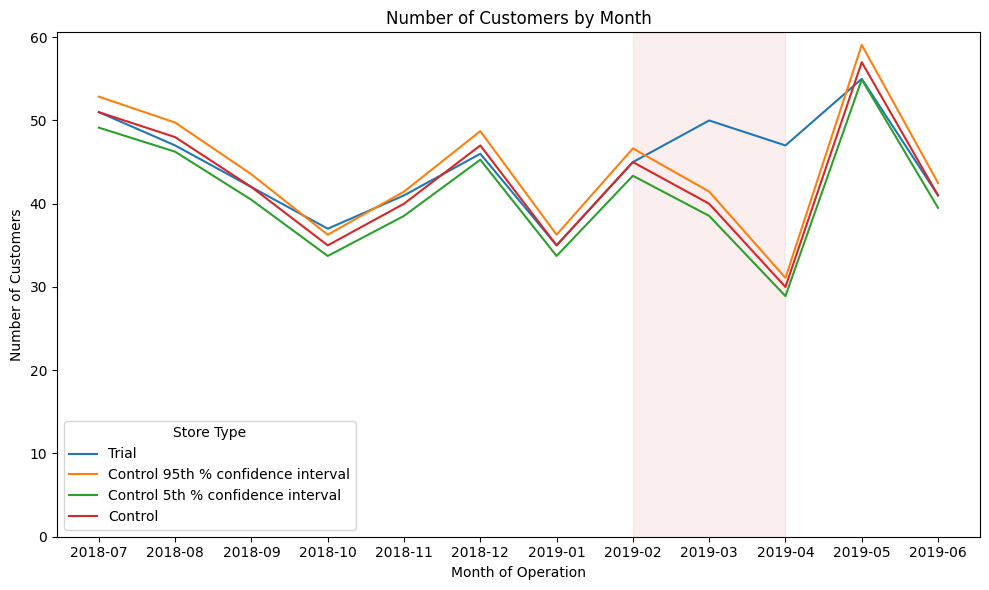

In [70]:
plt.figure(figsize=(10,6))
sns.lineplot(trialAssessment,
             x='year_month',
             y='n_customers',
             hue='store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Month')
plt.ylim(bottom = 0)
plt.legend(title = 'Store Type')
plt.axvspan(xmin='2019-02', xmax='2019-04', color = '#d65f5f', alpha = 0.1)
plt.tight_layout()
plt.savefig('customer_77.png')
plt.show()

This customer volume analysis between stores 77 and 233 yielded similar results to the sales analysis carried out earlier. The trial store (77) performs significantly better than the control store in the last two months of the three month trial period.

**Store 86: Total Sales and Number of Customers Correlations and Magnitude Distance**

In [71]:
trial_store = 86

corr_tot_sales = calcCorrelation('tot_sales',trial_store,pretrial_metric)
corr_n_customers = calcCorrelation('n_customers',trial_store,pretrial_metric)

mag_tot_sales = calcMagnitudeDistance('tot_sales',trial_store,pretrial_metric)
mag_n_customers = calcMagnitudeDistance('n_customers',trial_store,pretrial_metric)

In [72]:
sales86 = pd.concat([corr_tot_sales,mag_tot_sales['mag_distance']], axis=1)

sales86['sales_score'] = (sales86['corr_coef']*0.5) + (sales86['mag_distance']*0.5)

sales86.head()

,trial_store,control_store,corr_coef,mag_distance,sales_score
0,86,1,0.445632,0.488334,0.466983
1,86,2,-0.403835,0.321131,-0.041352
2,86,3,-0.261284,0.507515,0.123116
3,86,4,-0.039035,0.635654,0.298309
4,86,5,0.235159,0.579835,0.407497


In [73]:
customer86 = pd.concat([corr_n_customers,mag_n_customers['mag_distance']], axis=1)

customer86['customer_score'] = (customer86['corr_coef']*0.5) + (customer86['mag_distance']*0.5)

customer86.head()

,trial_store,control_store,corr_coef,mag_distance,customer_score
0,86,1,0.485831,0.510204,0.498018
1,86,2,-0.086161,0.428571,0.171205
2,86,3,-0.353786,0.563025,0.104620
3,86,4,-0.169608,0.537815,0.184103
4,86,5,-0.253229,0.714286,0.230528


In [74]:
score_control_86 = sales86.merge(customer86,on=['trial_store','control_store'])

In [75]:
score_control_86.rename(columns={'corr_coef_x': 'sales_corr_coef', 'mag_distance_x': 'sales_mag_distance',
                                 'corr_coef_y': 'cust_corr_coef', 'mag_distance_y': 'cust_mag_distance'}, inplace=True)

In [76]:
score_control_86.head()

,trial_store,control_store,sales_corr_coef,sales_mag_distance,sales_score,cust_corr_coef,cust_mag_distance,customer_score
0,86,1,0.445632,0.488334,0.466983,0.485831,0.510204,0.498018
1,86,2,-0.403835,0.321131,-0.041352,-0.086161,0.428571,0.171205
2,86,3,-0.261284,0.507515,0.123116,-0.353786,0.563025,0.104620
3,86,4,-0.039035,0.635654,0.298309,-0.169608,0.537815,0.184103
4,86,5,0.235159,0.579835,0.407497,-0.253229,0.714286,0.230528


In [77]:
score_control_86['final_control_score'] = (score_control_86['sales_score'] * 0.5) + (score_control_86['customer_score'] * 0.5)

In [78]:
control_store = score_control_86.sort_values(by='final_control_score',
                                             ascending=False).head(1)['control_store'].reset_index(drop=True).item()

In [79]:
control_store

155

In [80]:
store_agg['store_type'] = (store_agg['store_nbr']
                           .map({trial_store: 'Trial', control_store: 'Control'})
                           .fillna('Other Stores'))

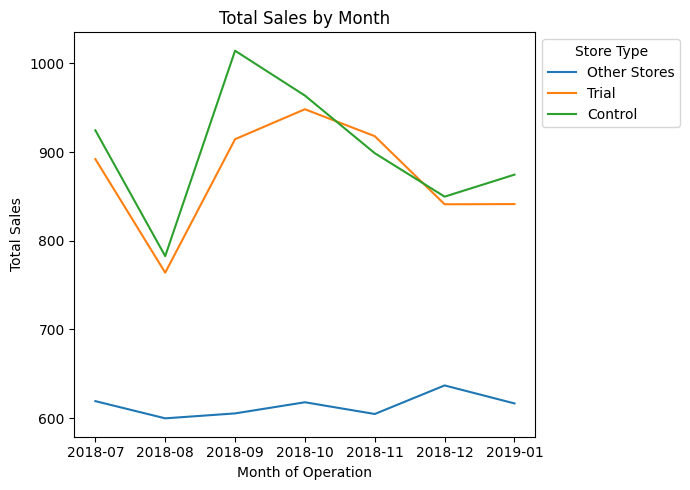

In [81]:
plt.figure(figsize=(7,5))
sns.lineplot(store_agg.loc[store_agg['year_month'] < '2019-02'],
             x='year_month',
             y='tot_sales',
             hue='store_type',
             err_style=None)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(title = 'Store Type', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.savefig('trial_86_monthly_sales.png')
plt.show()

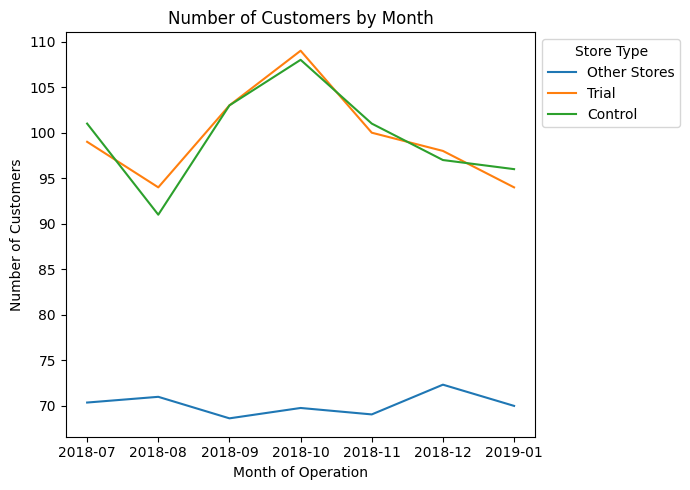

In [82]:
plt.figure(figsize=(7,5))
sns.lineplot(store_agg.loc[store_agg['year_month'] < '2019-02'],
             x='year_month',
             y='n_customers',
             hue='store_type',
             err_style=None)
plt.title('Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(title = 'Store Type', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.savefig('trial_86_n_customers.png')
plt.show()

The visualisations above shows the similarity in sales performance and customer volume between the trial store (86) and the control store (155). Hence, the consequent suitability of store 155 as the control store for the comparative analysis with the trial store 86.

In [83]:
scaling_factor_sales = (pretrial_metric.loc[pretrial_metric['store_nbr'] == trial_store]['tot_sales'].sum()/
                        pretrial_metric.loc[pretrial_metric['store_nbr'] == control_store]['tot_sales'].sum())

In [84]:
scaling_factor_sales

0.9700651481287743

In [85]:
scaled_control_sales = store_agg.loc[store_agg['store_nbr'] == control_store]

In [86]:
scaled_control_sales = scaled_control_sales.assign(
    control_sales = (scaled_control_sales['tot_sales'] * scaling_factor_sales)
)

In [87]:
percentDiff = scaled_control_sales[['year_month','control_sales']].reset_index(drop=True)

In [88]:
percentDiff = percentDiff.merge(right=store_agg[store_agg['store_nbr'] == trial_store][['year_month','tot_sales']].reset_index(drop=True).rename(columns={'tot_sales': 'trial_sales'}),
                  on='year_month')

In [89]:
percentDiff['percentage_diff'] = abs(percentDiff['control_sales'] - percentDiff['trial_sales'])/percentDiff['control_sales']

In [90]:
stdDev = stdev(percentDiff[(percentDiff['year_month'] < '2019-02')]['percentage_diff'])

In [91]:
degreesOfFreedom = 7

In [92]:
percentDiff['tValue'] = (percentDiff['percentage_diff'] - 0)/stdDev

In [93]:
percentDiff.head()

,year_month,control_sales,trial_sales,percentage_diff,tValue
0,2018-07,896.922236,892.20,0.005265,0.203799
1,2018-08,759.269991,764.05,0.006296,0.243692
2,2018-09,984.034086,914.60,0.070561,2.731315
3,2018-10,934.948790,948.40,0.014387,0.556907
4,2018-11,871.894555,918.00,0.052880,2.046904


In [94]:
pastSales = (
    percentDiff[['year_month', 'trial_sales']]  # Extract columns
    .rename(columns={'trial_sales': 'totSales'})  # Rename column
    .assign(Store_type='Trial')  # Add new column
)

pastSales.head()

,year_month,totSales,Store_type
0,2018-07,892.20,Trial
1,2018-08,764.05,Trial
2,2018-09,914.60,Trial
3,2018-10,948.40,Trial
4,2018-11,918.00,Trial


In [95]:
pastControlSales = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .rename(columns={'control_sales': 'totSales'})  # Rename column
    .assign(Store_type='Control')  # Add new column
)

pastControlSales.head()

,year_month,totSales,Store_type
0,2018-07,896.922236,Control
1,2018-08,759.269991,Control
2,2018-09,984.034086,Control
3,2018-10,934.948790,Control
4,2018-11,871.894555,Control


In [96]:
pastSales_Control95 = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .assign(totSales=lambda df: df['control_sales'] * (1 + (stdDev * 2)))  # Compute totSales
    .drop(columns=['control_sales'])  # Drop the control_sales column
    .assign(Store_type='Control 95th % confidence interval')  # Add Store_type column
)

pastSales_Control95.head()

,year_month,totSales,Store_type
0,2018-07,943.264329,Control 95th % confidence interval
1,2018-08,798.499882,Control 95th % confidence interval
2,2018-09,1034.877067,Control 95th % confidence interval
3,2018-10,983.255636,Control 95th % confidence interval
4,2018-11,916.943521,Control 95th % confidence interval


In [97]:
pastSales_Control5 = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .assign(totSales=lambda df: df['control_sales'] * (1 - (stdDev * 2)))  # Compute totSales
    .drop(columns=['control_sales'])  # Drop the control_sales column
    .assign(Store_type='Control 5th % confidence interval')  # Add Store_type column
)

pastSales_Control5.head()

,year_month,totSales,Store_type
0,2018-07,850.580142,Control 5th % confidence interval
1,2018-08,720.040101,Control 5th % confidence interval
2,2018-09,933.191106,Control 5th % confidence interval
3,2018-10,886.641944,Control 5th % confidence interval
4,2018-11,826.845589,Control 5th % confidence interval


In [98]:
trialAssessment = (pd.concat([pastSales,pastControlSales,pastSales_Control5,pastSales_Control95], axis=0)
                   .sort_values('year_month')
                   .reset_index(drop=True))

trialAssessment.head()

,year_month,totSales,Store_type
0,2018-07,892.200000,Trial
1,2018-07,850.580142,Control 5th % confidence interval
2,2018-07,943.264329,Control 95th % confidence interval
3,2018-07,896.922236,Control
4,2018-08,764.050000,Trial


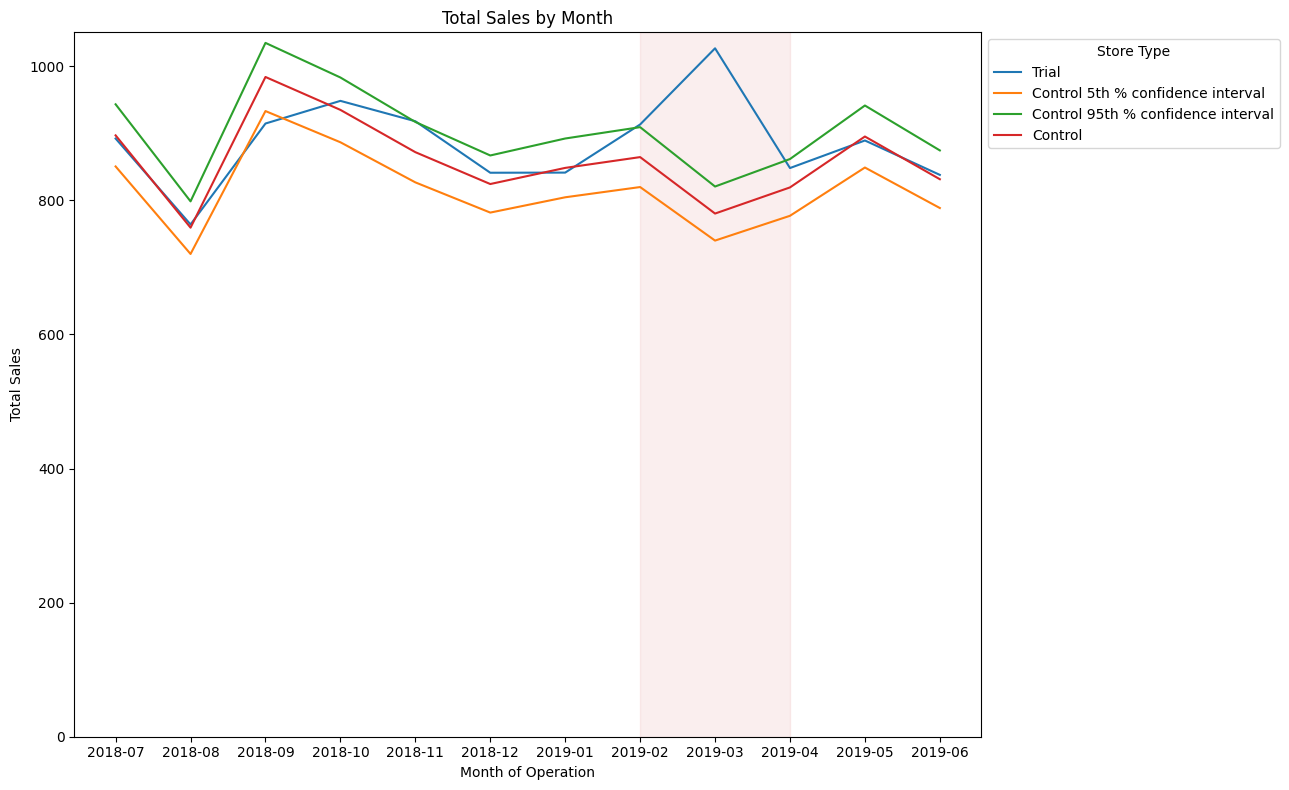

In [99]:
plt.figure(figsize=(13,8))
sns.lineplot(trialAssessment,
             x='year_month',
             y='totSales',
             hue='Store_type')
plt.ylim(bottom = 0)
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.legend(title = 'Store Type', bbox_to_anchor = (1,1))
plt.axvspan(xmin='2019-02', xmax='2019-04', color = '#d65f5f', alpha = 0.1)
plt.tight_layout()
plt.savefig('sales_86.png')
plt.show()

The results show that the trial in store 86 is not significantly different to its 
control store in the trial period as the trial store performance lies inside the 5%
to 95% confidence interval of the control store in two of the three trial months.

In [100]:
scaling_factor_customer = (pretrial_metric.loc[pretrial_metric['store_nbr'] == trial_store]['n_customers'].sum()/
                           pretrial_metric.loc[pretrial_metric['store_nbr'] == control_store]['n_customers'].sum())

In [101]:
scaled_control_customer = store_agg.loc[store_agg['store_nbr'] == control_store]

In [102]:
scaled_control_customer = scaled_control_customer.assign(
    control_customer = (scaled_control_customer['n_customers'] * scaling_factor_customer)
)

In [103]:
trial_customer = store_agg[['year_month', 'store_nbr', 'n_customers']]
trial_customer = trial_customer.loc[trial_customer['store_nbr'] == trial_store]
trial_customer.drop(columns=['store_nbr'], inplace=True)

In [104]:
percentageDiff = (
    scaled_control_customer[['year_month','control_customer']]
    .merge(right = trial_customer, on = 'year_month')
    .rename(columns = {'n_customers' : 'trial_customers'})
    .assign(percDiff = lambda df: abs(df['control_customer'] - df['trial_customers'])/df['control_customer'])
)

percentageDiff.head()

,year_month,control_customer,trial_customers,percDiff
0,2018-07,101.0,99,0.019802
1,2018-08,91.0,94,0.032967
2,2018-09,103.0,103,0.000000
3,2018-10,108.0,109,0.009259
4,2018-11,101.0,100,0.009901


In [105]:
stdDev = stdev(percentageDiff[percentageDiff['year_month'] < '2019-02']['percDiff'])

In [106]:
degreesOfFreedom = 7 # 8 months under observation, hence the degree of freedom is (8 - 1 = 7)

In [107]:
pastCustomers = store_agg[['year_month','n_customers','store_type']]
pastCustomers = pastCustomers.loc[pastCustomers['store_type'].isin(['Trial','Control'])].reset_index(drop=True)

pastCustomers.head()

,year_month,n_customers,store_type
0,2018-07,99,Trial
1,2018-08,94,Trial
2,2018-09,103,Trial
3,2018-10,109,Trial
4,2018-11,100,Trial


In [108]:
pastCustomers_Control95 = (
    pastCustomers[pastCustomers['store_type'] == 'Control']
    .assign(n_customers = lambda df: df['n_customers'] * (1 + stdDev * 2))
    .assign(store_type = 'Control 95th % confidence interval')
    .reset_index(drop=True)
)

pastCustomers_Control95.head()

,year_month,n_customers,store_type
0,2018-07,103.158864,Control 95th % confidence interval
1,2018-08,92.945115,Control 95th % confidence interval
2,2018-09,105.201614,Control 95th % confidence interval
3,2018-10,110.308488,Control 95th % confidence interval
4,2018-11,103.158864,Control 95th % confidence interval


In [109]:
pastCustomers_Control5 = (
    pastCustomers[pastCustomers['store_type'] == 'Control']
    .assign(n_customers = lambda df: df['n_customers'] * (1 - stdDev * 2))
    .assign(store_type = 'Control 5th % confidence interval')
    .reset_index(drop=True)
)

pastCustomers_Control5.head()

,year_month,n_customers,store_type
0,2018-07,98.841136,Control 5th % confidence interval
1,2018-08,89.054885,Control 5th % confidence interval
2,2018-09,100.798386,Control 5th % confidence interval
3,2018-10,105.691512,Control 5th % confidence interval
4,2018-11,98.841136,Control 5th % confidence interval


In [110]:
trialAssessment = (
    pd.concat([pastCustomers,pastCustomers_Control95,pastCustomers_Control5], axis=0)
    .sort_values('year_month', ascending=True)
    .reset_index(drop=True)
)

trialAssessment.head()

,year_month,n_customers,store_type
0,2018-07,99.000000,Trial
1,2018-07,103.158864,Control 95th % confidence interval
2,2018-07,98.841136,Control 5th % confidence interval
3,2018-07,101.000000,Control
4,2018-08,94.000000,Trial


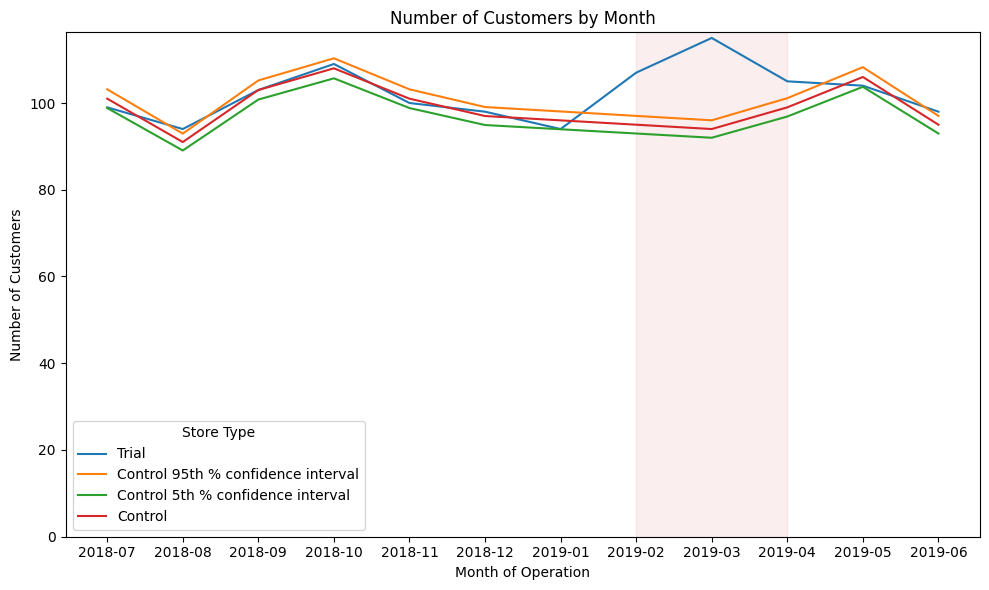

In [111]:
plt.figure(figsize=(10,6))
sns.lineplot(trialAssessment,
             x='year_month',
             y='n_customers',
             hue='store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Month')
plt.ylim(bottom = 0)
plt.legend(title = 'Store Type')
plt.axvspan(xmin='2019-02', xmax='2019-04', color = '#d65f5f', alpha = 0.1)
plt.tight_layout()
plt.savefig('customer_86.png')
plt.show()

The result shows that there is a significant difference in the customer volume during the trial months, however since this not reflected in the sales analysis. We should check with the category manager if there were special deals on chips products resulting in lower prices, consequently less sales.

**Store 88: Total Sales and Number of Customers Correlations and Magnitude Distance**

In [112]:
trial_store = 88

corr_tot_sales = calcCorrelation('tot_sales',trial_store,pretrial_metric)
corr_n_customers = calcCorrelation('n_customers',trial_store,pretrial_metric)

mag_tot_sales = calcMagnitudeDistance('tot_sales',trial_store,pretrial_metric)
mag_n_customers = calcMagnitudeDistance('n_customers',trial_store,pretrial_metric)

In [113]:
sales88 = pd.concat([corr_tot_sales,mag_tot_sales['mag_distance']], axis=1)

sales88['sales_score'] = (sales88['corr_coef']*0.5) + (sales88['mag_distance']*0.5)

sales88.head()

,trial_store,control_store,corr_coef,mag_distance,sales_score
0,88,1,0.813636,0.548959,0.681297
1,88,2,-0.067927,0.541212,0.236643
2,88,3,-0.507847,0.458109,-0.024869
3,88,4,-0.745566,0.484447,-0.130559
4,88,5,0.190330,0.496409,0.343370


In [114]:
customer88 = pd.concat([corr_n_customers,mag_n_customers['mag_distance']], axis=1)

customer88['customer_score'] = (customer88['corr_coef']*0.5) + (customer88['mag_distance']*0.5)

customer88.head()

,trial_store,control_store,corr_coef,mag_distance,customer_score
0,88,1,0.305334,0.357143,0.331238
1,88,2,-0.452379,0.285714,-0.083332
2,88,3,0.522884,0.683673,0.603279
3,88,4,-0.361503,0.577922,0.108210
4,88,5,-0.025320,0.558442,0.266561


In [115]:
score_control_88 = sales88.merge(customer88,on=['trial_store','control_store'])

In [116]:
score_control_88.rename(columns={'corr_coef_x': 'sales_corr_coef', 'mag_distance_x': 'sales_mag_distance',
                                 'corr_coef_y': 'cust_corr_coef', 'mag_distance_y': 'cust_mag_distance'}, inplace=True)

In [117]:
score_control_88.head()

,trial_store,control_store,sales_corr_coef,sales_mag_distance,sales_score,cust_corr_coef,cust_mag_distance,customer_score
0,88,1,0.813636,0.548959,0.681297,0.305334,0.357143,0.331238
1,88,2,-0.067927,0.541212,0.236643,-0.452379,0.285714,-0.083332
2,88,3,-0.507847,0.458109,-0.024869,0.522884,0.683673,0.603279
3,88,4,-0.745566,0.484447,-0.130559,-0.361503,0.577922,0.108210
4,88,5,0.190330,0.496409,0.343370,-0.025320,0.558442,0.266561


In [118]:
score_control_88['final_control_score'] = (score_control_88['sales_score'] * 0.5) + (score_control_88['customer_score'] * 0.5)

In [119]:
score_control_88.sort_values('final_control_score', ascending=False).head()

,trial_store,control_store,sales_corr_coef,sales_mag_distance,sales_score,cust_corr_coef,cust_mag_distance,customer_score,final_control_score
170,88,178,0.731857,0.569749,0.650803,0.939466,0.476190,0.707828,0.679316
12,88,14,0.698557,0.593571,0.646064,0.942976,0.428571,0.685774,0.665919
126,88,134,0.864293,0.685875,0.775084,0.508880,0.571429,0.540154,0.657619
225,88,237,0.308479,0.595469,0.451974,0.947326,0.607143,0.777235,0.614604
179,88,187,0.599076,0.634428,0.616752,0.671264,0.517857,0.594560,0.605656


After checking the significance of visualisations, store 237 was determined to be the most compatible and relevant to the trial store 88

In [120]:
control_store = 237

In [121]:
store_agg['store_type'] = store_agg['store_nbr'].map({trial_store: 'Trial', control_store: 'Control'}).fillna('Other Stores')

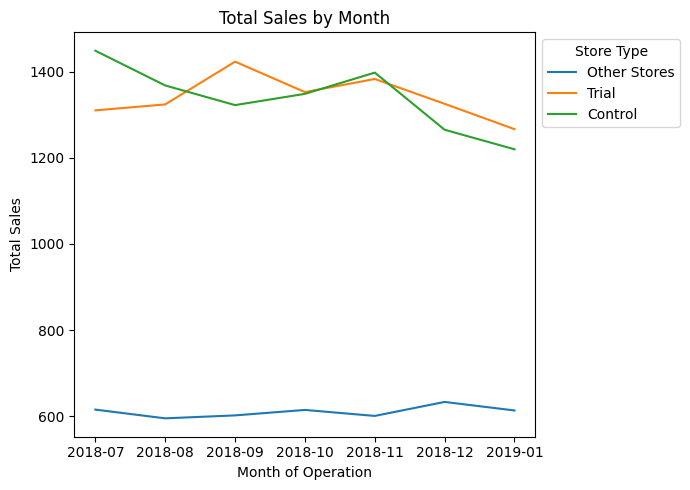

In [122]:
plt.figure(figsize=(7,5))
sns.lineplot(store_agg.loc[store_agg['year_month'] < '2019-02'],
             x='year_month',
             y='tot_sales',
             hue='store_type',
             err_style=None)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(title = 'Store Type', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.savefig('trial_88_monthly_sales.png')
plt.show()

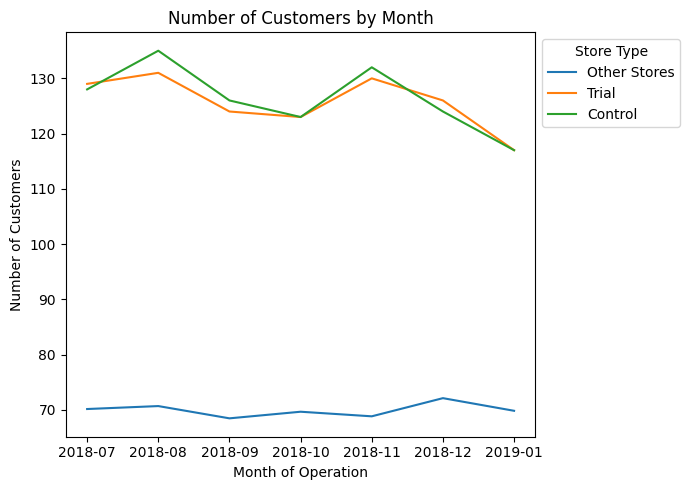

In [123]:
plt.figure(figsize=(7,5))
sns.lineplot(store_agg.loc[store_agg['year_month'] < '2019-02'],
             x='year_month',
             y='n_customers',
             hue='store_type',
             err_style=None)
plt.title('Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(title = 'Store Type', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.savefig('trial_88_n_customers.png')
plt.show()

It can be visually observed the significance of the similarity between the trial store (88) and the control store (237) in both sales and customer volume metrics. Hence, store 237 serves as a suitable store for the comparative analysis with the trial store (88)

In [124]:
scaling_factor_sales = (pretrial_metric.loc[pretrial_metric['store_nbr'] == trial_store]['tot_sales'].sum()/
                        pretrial_metric.loc[pretrial_metric['store_nbr'] == control_store]['tot_sales'].sum())

In [125]:
scaling_factor_sales

1.001558330664959

In [126]:
scaled_control_sales = store_agg.loc[store_agg['store_nbr'] == control_store]

In [127]:
scaled_control_sales = scaled_control_sales.assign(
    control_sales = (scaled_control_sales['tot_sales'] * scaling_factor_sales)
)

In [128]:
percentDiff = scaled_control_sales[['year_month','control_sales']].reset_index(drop=True)

In [129]:
percentDiff = percentDiff.merge(right=store_agg[store_agg['store_nbr'] == trial_store][['year_month','tot_sales']].reset_index(drop=True).rename(columns={'tot_sales': 'trial_sales'}),
                  on='year_month')

In [130]:
percentDiff['percentage_diff'] = abs(percentDiff['control_sales'] - percentDiff['trial_sales'])/percentDiff['control_sales']

In [131]:
stdDev = stdev(percentDiff[(percentDiff['year_month'] < '2019-02')]['percentage_diff'])

In [132]:
degreesOfFreedom = 7

In [133]:
percentDiff['tValue'] = (percentDiff['percentage_diff'] - 0)/stdDev

In [134]:
percentDiff.head()

,year_month,control_sales,trial_sales,percentage_diff,tValue
0,2018-07,1450.657086,1310.0,0.096961,2.897136
1,2018-08,1369.931485,1323.8,0.033674,1.006168
2,2018-09,1324.260425,1423.0,0.074562,2.227870
3,2018-10,1350.401097,1352.4,0.001480,0.044228
4,2018-11,1399.777923,1382.8,0.012129,0.362408


In [135]:
pastSales = (
    percentDiff[['year_month', 'trial_sales']]  # Extract columns
    .rename(columns={'trial_sales': 'totSales'})  # Rename column
    .assign(Store_type='Trial')  # Add new column
)

pastSales.head()

,year_month,totSales,Store_type
0,2018-07,1310.0,Trial
1,2018-08,1323.8,Trial
2,2018-09,1423.0,Trial
3,2018-10,1352.4,Trial
4,2018-11,1382.8,Trial


In [136]:
pastControlSales = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .rename(columns={'control_sales': 'totSales'})  # Rename column
    .assign(Store_type='Control')  # Add new column
)

pastControlSales.head()

,year_month,totSales,Store_type
0,2018-07,1450.657086,Control
1,2018-08,1369.931485,Control
2,2018-09,1324.260425,Control
3,2018-10,1350.401097,Control
4,2018-11,1399.777923,Control


In [137]:
pastSales_Control95 = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .assign(totSales=lambda df: df['control_sales'] * (1 + (stdDev * 2)))  # Compute totSales
    .drop(columns=['control_sales'])  # Drop the control_sales column
    .assign(Store_type='Control 95th % confidence interval')  # Add Store_type column
)

pastSales_Control95.head()

,year_month,totSales,Store_type
0,2018-07,1547.757884,Control 95th % confidence interval
1,2018-08,1461.628855,Control 95th % confidence interval
2,2018-09,1412.900769,Control 95th % confidence interval
3,2018-10,1440.791187,Control 95th % confidence interval
4,2018-11,1493.473086,Control 95th % confidence interval


In [138]:
pastSales_Control5 = (
    percentDiff[['year_month', 'control_sales']]  # Extract columns
    .assign(totSales=lambda df: df['control_sales'] * (1 - (stdDev * 2)))  # Compute totSales
    .drop(columns=['control_sales'])  # Drop the control_sales column
    .assign(Store_type='Control 5th % confidence interval')  # Add Store_type column
)

pastSales_Control5.head()

,year_month,totSales,Store_type
0,2018-07,1353.556288,Control 5th % confidence interval
1,2018-08,1278.234114,Control 5th % confidence interval
2,2018-09,1235.620080,Control 5th % confidence interval
3,2018-10,1260.011008,Control 5th % confidence interval
4,2018-11,1306.082759,Control 5th % confidence interval


In [139]:
trialAssessment = (pd.concat([pastSales,pastControlSales,pastSales_Control5,pastSales_Control95], axis=0)
                   .sort_values('year_month')
                   .reset_index(drop=True))

trialAssessment.head()

,year_month,totSales,Store_type
0,2018-07,1310.000000,Trial
1,2018-07,1353.556288,Control 5th % confidence interval
2,2018-07,1547.757884,Control 95th % confidence interval
3,2018-07,1450.657086,Control
4,2018-08,1323.800000,Trial


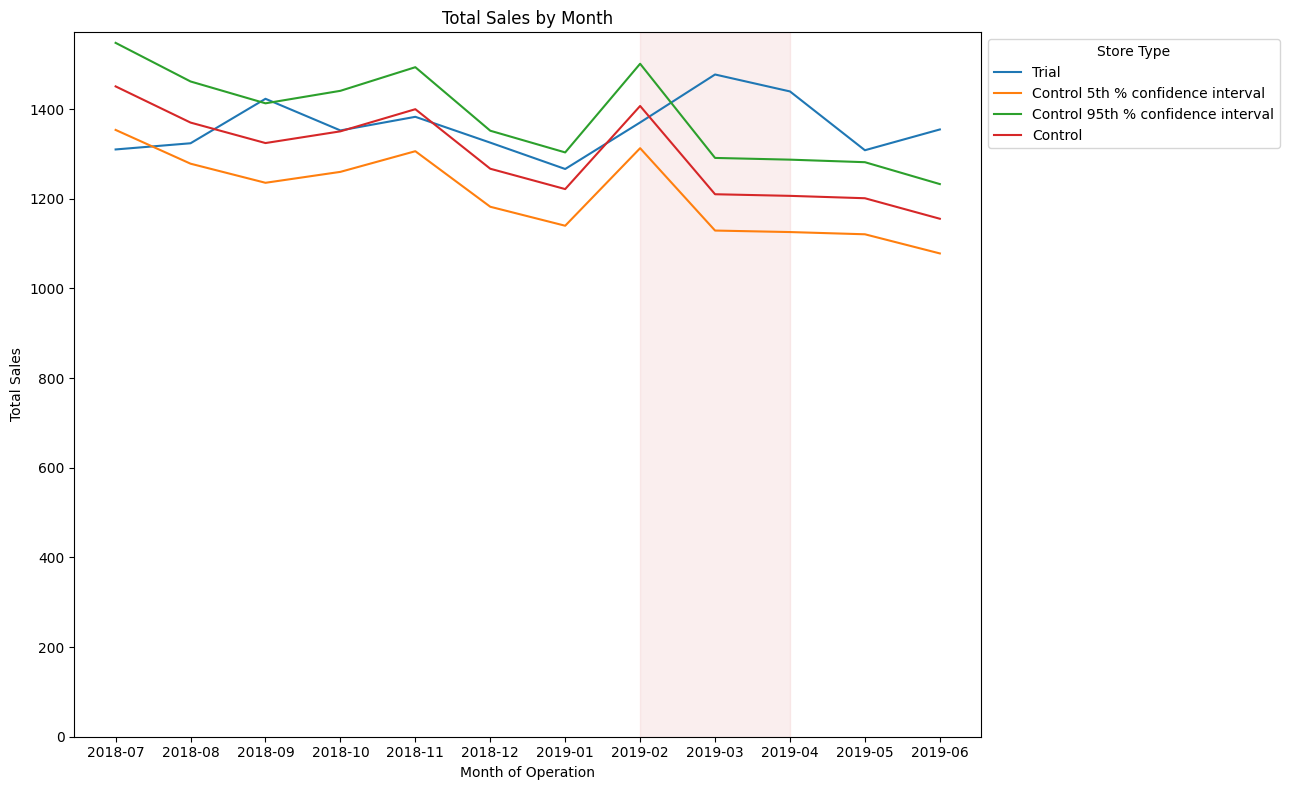

In [140]:
plt.figure(figsize=(13,8))
sns.lineplot(trialAssessment,
             x='year_month',
             y='totSales',
             hue='Store_type')
#plt.ylim(bottom = 0)
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.ylim(bottom = 0)
plt.legend(title = 'Store Type', bbox_to_anchor = (1,1))
plt.axvspan(xmin='2019-02', xmax='2019-04', color = '#d65f5f', alpha = 0.1)
plt.tight_layout()
plt.savefig('sales_88.png')
plt.show()

The results show that there is significant difference in the sales perfomance between the trial and the control stores. The trial store performed evidently better than the control store in two months from the three month trial period.

In [141]:
scaling_factor_customer = (pretrial_metric.loc[pretrial_metric['store_nbr'] == trial_store]['n_customers'].sum()/
                           pretrial_metric.loc[pretrial_metric['store_nbr'] == control_store]['n_customers'].sum())

In [142]:
scaled_control_customer = store_agg.loc[store_agg['store_nbr'] == control_store]

In [143]:
scaled_control_customer = scaled_control_customer.assign(
    control_customer = (scaled_control_customer['n_customers'] * scaling_factor_customer)
)

In [144]:
trial_customer = store_agg[['year_month', 'store_nbr', 'n_customers']]
trial_customer = trial_customer.loc[trial_customer['store_nbr'] == trial_store]
trial_customer.drop(columns=['store_nbr'], inplace=True)

In [145]:
percentageDiff = (
    scaled_control_customer[['year_month','control_customer']]
    .merge(right = trial_customer, on = 'year_month')
    .rename(columns = {'n_customers' : 'trial_customers'})
    .assign(percDiff = lambda df: abs(df['control_customer'] - df['trial_customers'])/df['control_customer'])
)

percentageDiff.head()

,year_month,control_customer,trial_customers,percDiff
0,2018-07,127.276836,129,0.013539
1,2018-08,134.237288,131,0.024116
2,2018-09,125.288136,124,0.010281
3,2018-10,122.305085,123,0.005682
4,2018-11,131.254237,130,0.009556


In [146]:
stdDev = stdev(percentageDiff[percentageDiff['year_month'] < '2019-02']['percDiff'])

In [147]:
degreesOfFreedom = 7 # 8 months under observation, hence the degree of freedom is (8 - 1 = 7)

In [148]:
pastCustomers = store_agg[['year_month','n_customers','store_type']]
pastCustomers = pastCustomers.loc[pastCustomers['store_type'].isin(['Trial','Control'])].reset_index(drop=True)
pastCustomers.head()

,year_month,n_customers,store_type
0,2018-07,129,Trial
1,2018-08,131,Trial
2,2018-09,124,Trial
3,2018-10,123,Trial
4,2018-11,130,Trial


In [149]:
pastCustomers_Control95 = (
    pastCustomers[pastCustomers['store_type'] == 'Control']
    .assign(n_customers = lambda df: df['n_customers'] * (1 + stdDev * 2))
    .assign(store_type = 'Control 95th % confidence interval')
    .reset_index(drop=True)
)

pastCustomers_Control95.head()

,year_month,n_customers,store_type
0,2018-07,129.897023,Control 95th % confidence interval
1,2018-08,137.000766,Control 95th % confidence interval
2,2018-09,127.867382,Control 95th % confidence interval
3,2018-10,124.822920,Control 95th % confidence interval
4,2018-11,133.956305,Control 95th % confidence interval


In [150]:
pastCustomers_Control5 = (
    pastCustomers[pastCustomers['store_type'] == 'Control']
    .assign(n_customers = lambda df: df['n_customers'] * (1 - stdDev * 2))
    .assign(store_type = 'Control 5th % confidence interval')
    .reset_index(drop=True)
)

pastCustomers_Control5.head()

,year_month,n_customers,store_type
0,2018-07,126.102977,Control 5th % confidence interval
1,2018-08,132.999234,Control 5th % confidence interval
2,2018-09,124.132618,Control 5th % confidence interval
3,2018-10,121.177080,Control 5th % confidence interval
4,2018-11,130.043695,Control 5th % confidence interval


In [151]:
trialAssessment = (
    pd.concat([pastCustomers,pastCustomers_Control95,pastCustomers_Control5], axis=0)
    .sort_values('year_month', ascending=True)
    .reset_index(drop=True)
)

trialAssessment.head()

,year_month,n_customers,store_type
0,2018-07,129.000000,Trial
1,2018-07,129.897023,Control 95th % confidence interval
2,2018-07,126.102977,Control 5th % confidence interval
3,2018-07,128.000000,Control
4,2018-08,131.000000,Trial


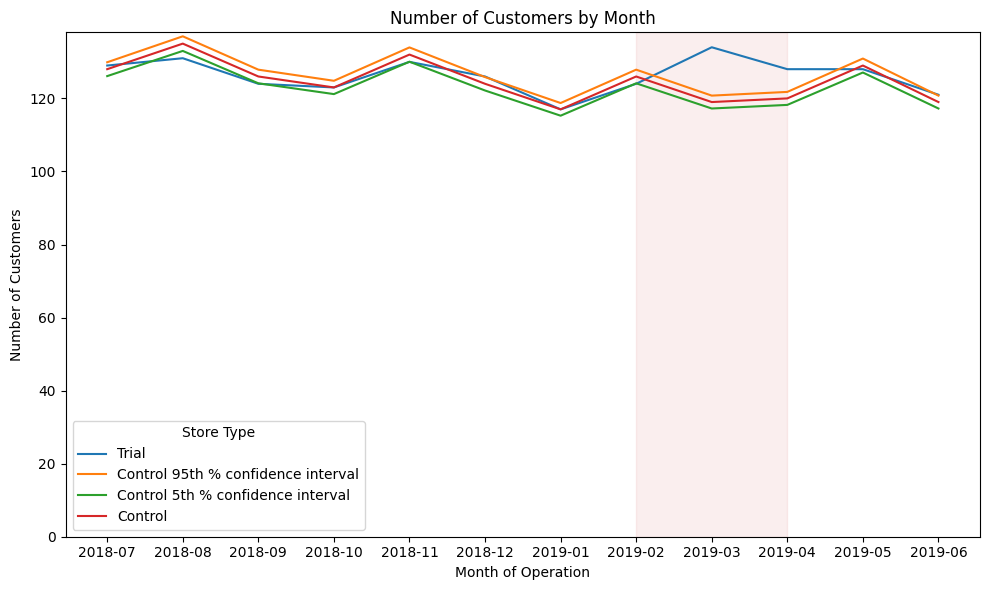

In [152]:
plt.figure(figsize=(10,6))
sns.lineplot(trialAssessment,
             x='year_month',
             y='n_customers',
             hue='store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Month')
plt.ylim(bottom = 0)
plt.legend(title = 'Store Type')
plt.axvspan(xmin='2019-02', xmax='2019-04', color = '#d65f5f', alpha = 0.1)
plt.tight_layout()
plt.savefig('customers_88.png')
plt.show()

Total number of customers in the trial period for the trial store is significantly 
higher than the control store for two out of three months, which indicates a 
positive trial effect.

**Conclusion**
 
We’ve found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.

Based on the exploratory data analysis, trial stores 77 and 86 demonstrated a significant increase in the total sales and number of customers for at least two of the three months during the trial period. In contrast, while trial store 88 did show a notable rise in customer numbers, this increase was not statistically significant according to the analysis.